In [2]:
#Loading of the dtaset before filtrering
import pandas as pd

df = pd.read_csv("data/laion_aesthetic_subset_metadata.csv")
print("Images avant filtrage :", len(df))


Images avant filtrage : 19810


In [3]:
#Definition of the filters
df["caption_len_words"] = df["caption"].fillna("").apply(lambda x: len(str(x).split()))

filtered_df = df[
    (df["width"] >= 256) &
    (df["height"] >= 256) &
    (df["caption_len_words"] >= 3) &
    (df["caption_len_words"] <= 40) &
    (df["punsafe"] <= 0.3) &
    (df["pwatermark"] <= 0.2)
]


In [4]:
# Results of the filters
print("Images après filtrage :", len(filtered_df))
print(f"Pourcentage conservé : {len(filtered_df) / len(df) * 100:.2f}%")


Images après filtrage : 8897
Pourcentage conservé : 44.91%


In [5]:
# descriptive statistics
filtered_df[["width", "height", "punsafe", "pwatermark", "aesthetic_score", "caption_len_words"]].describe()


,width,height,punsafe,pwatermark,aesthetic_score,caption_len_words
count,8897.000000,8897.000000,8.897000e+03,8897.000000,8897.000000,8897.000000
mean,722.664943,616.712487,3.325814e-03,0.102540,6.643338,10.615039
std,511.954190,434.587091,2.145285e-02,0.048160,0.136542,6.435944
min,256.000000,256.000000,5.577356e-09,0.000000,6.500031,3.000000
25%,450.000000,350.000000,2.498282e-06,0.063276,6.542391,6.000000
50%,596.000000,493.000000,1.527169e-05,0.098174,6.604503,9.000000
75%,803.000000,744.000000,1.341105e-04,0.141056,6.699809,13.000000
max,7378.000000,7171.000000,2.984684e-01,0.199971,7.633709,40.000000


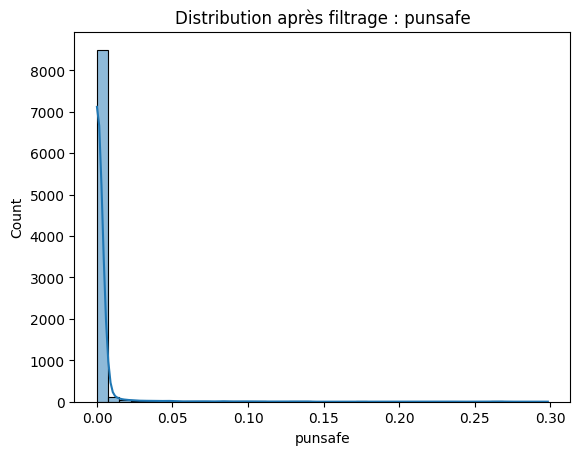

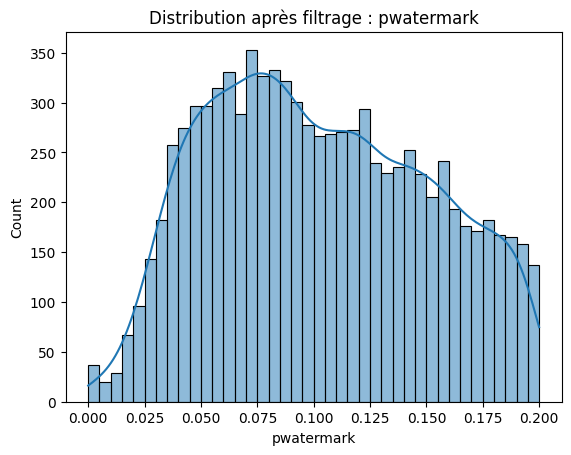

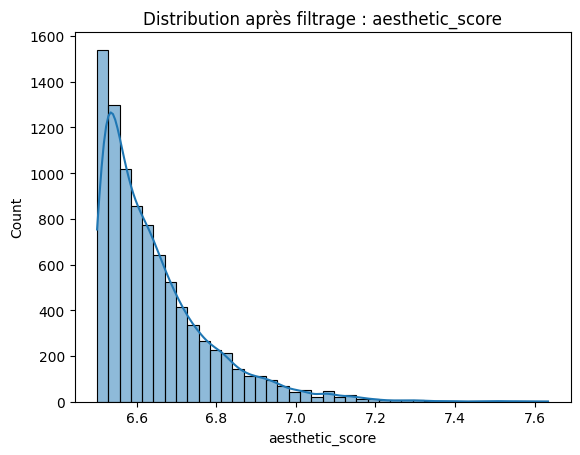

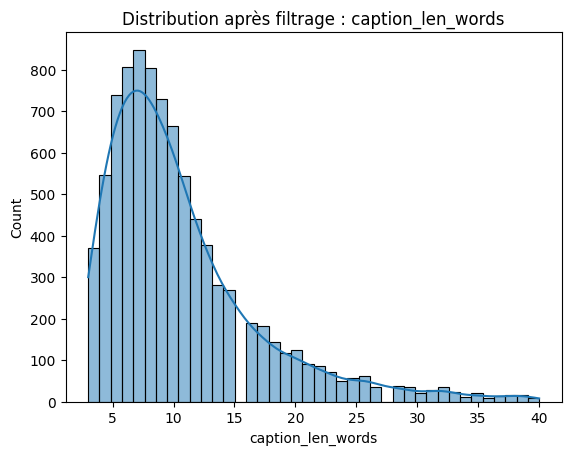

In [6]:
#histograms
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["punsafe", "pwatermark", "aesthetic_score", "caption_len_words"]:
    plt.figure()
    sns.histplot(filtered_df[col], bins=40, kde=True)
    plt.title(f"Distribution après filtrage : {col}")
    plt.show()


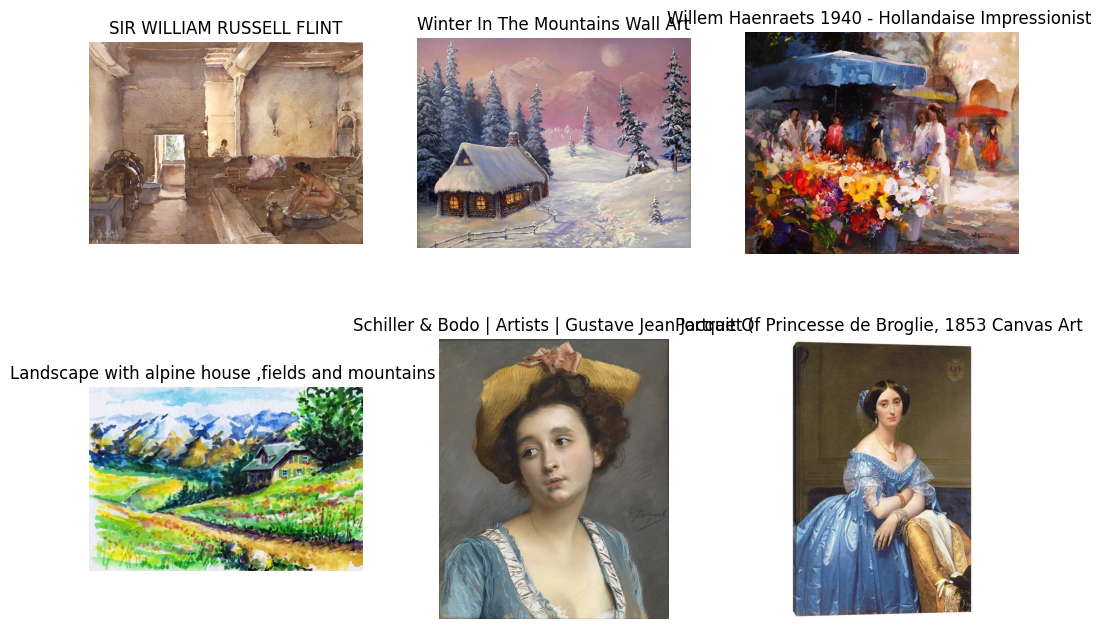

In [7]:
#Visualization of the filtrered images 
from PIL import Image
import matplotlib.pyplot as plt
import random

samples = filtered_df.sample(6)

plt.figure(figsize=(12, 8))
for i, (_, row) in enumerate(samples.iterrows(), 1):
    img = Image.open(row["image_path"])
    plt.subplot(2, 3, i)
    plt.imshow(img)
    plt.axis("off")
    plt.title(row["caption"][:50])
plt.show()


In [10]:
#Now we save our filtrered dataset
filtered_df.to_csv("data/laion_aesthetic_light.csv", index=False)
print("Dataset 'light' sauvegardé.")


Dataset 'light' sauvegardé.
